In [146]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2' -O "multiclass.csv"

--2024-03-15 15:43:32--  https://drive.google.com/uc?export=download&id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
Resolving drive.google.com... 142.250.180.14
Connecting to drive.google.com|142.250.180.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2&export=download [following]
--2024-03-15 15:43:32--  https://drive.usercontent.google.com/download?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2&export=download
Resolving drive.usercontent.google.com... 142.250.178.1
Connecting to drive.usercontent.google.com|142.250.178.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14578 (14K) [application/octet-stream]
Saving to: 'HR-Employee-Attrition.csv'

HR-Employee-Attriti 100%[===================>]  14.24K  --.-KB/s    in 0.06s   

2024-03-15 15:43:34 (242 KB/s) - 'HR-Employee-Attrition.csv' saved [14578/14578]



In [3]:
df = pd.read_csv("multiclass.csv")

In [4]:
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


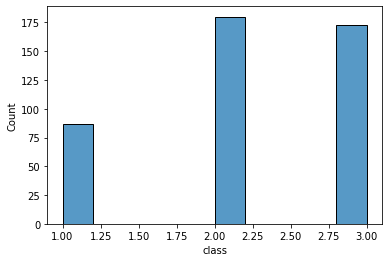

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x = "class")
plt.show()

In [6]:
# This shows that the data is imbalance

In [12]:
y = df[['class']].copy()

In [13]:
y.head()

,class
0,2
1,2
2,2
3,1
4,1


In [14]:
X = df.drop(["class"], axis  = 1).copy()

In [15]:
X.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [16]:
#we have X as Features and y as Target

In [17]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)

In [20]:
viz = pca.fit_transform(X)

In [21]:
viz[0]

array([ 650.02212362, 1585.51909033])

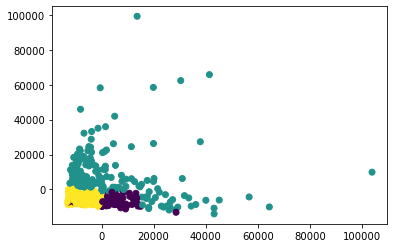

In [24]:
plt.scatter(viz[:,0], viz[:,1], c=y.values[:,0])
plt.show()

In [25]:
# Starting to implement KNN

# Step 1 in any Machine learning Implementation - Test-Train Split [Very Important]

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42) # Random state will help to reproduce the result

In [94]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.25, random_state=42)

In [95]:
X_train.shape

(264, 7)

In [96]:
X_test.shape

(88, 7)

In [97]:
X_val.shape

(88, 7)

In [98]:
# The problem is that our dataset is not balanced, lets use S.M.O.T.E

In [99]:
from imblearn.over_sampling import SMOTE

In [100]:
smt = SMOTE()

In [101]:
X_train,y_train = smt.fit_resample(X_train, y_train)

In [102]:
y_train.value_counts()

class
1        108
2        108
3        108
dtype: int64

In [41]:
mu = X_train.mean()
std = X_train.std()

In [42]:
X_train = (X_train-mu)/std
X_test = (X_test-mu)/std
X_val = (X_val-mu)/std

In [44]:
y_train = y_train.values[:,0]
y_test = y_test.values[:,0]
y_val = y_val.values[:,0]

In [45]:
# Applying the KNN Algorithm

In [ ]:
# Step 1  =  Get the query data

In [48]:
query = X_val.values[50]

In [49]:
query

array([ 0.72980249,  1.40175338, -0.20036508, -0.05764445,  0.30351698,
       -0.41988199,  0.32609938])

In [50]:
# Step 2  = find the Euclidean Distance from all points of the query point

In [55]:
dist = np.sqrt(np.sum((X_train-query)**2, axis = 1))

In [57]:
dist.shape

(324,)

In [58]:
# Step 3 = Assign class corresponding to the Euclidean distances

In [59]:
distances = [(dist[i],y_train[i]) for i in range(len(dist))]

In [60]:
distances

[(2.2559766896838536, 3),
 (1.841991932508719, 1),
 (2.8303068624011614, 1),
 (2.3292820597019332, 3),
 (2.50697062955386, 3),
 (3.2365994681327184, 2),
 (1.1757516236595675, 2),
 (0.8181813763392215, 1),
 (1.7561784010616996, 1),
 (3.5656411998939554, 2),
 (2.5899284483932346, 3),
 (2.9061102804358905, 2),
 (2.67694867005069, 1),
 (2.8493011593251465, 3),
 (2.5358383079728593, 1),
 (2.830782858369472, 3),
 (3.039281737610281, 3),
 (2.8848489409874616, 2),
 (4.218154308333792, 2),
 (2.649872362732713, 1),
 (2.8276850760815915, 3),
 (2.4131727545851236, 2),
 (3.775838254847791, 2),
 (2.024448116895419, 3),
 (2.8731507158660756, 1),
 (1.6180446300787865, 3),
 (1.5800197475080873, 1),
 (2.732897212201934, 3),
 (2.4480134512181455, 3),
 (5.45293897027138, 2),
 (1.6480632053667366, 1),
 (1.6786938301983334, 2),
 (1.2575015885475342, 1),
 (2.002367144463457, 3),
 (10.209286056689782, 2),
 (3.8805059254080243, 2),
 (4.2243572015146285, 2),
 (2.6624830556170163, 1),
 (1.3848067718934542, 2),
 

In [64]:
# Step 4 = Sort the distances and find the top 3 for K-NN ; K=5

In [65]:
sorted(distances)

[(0.8181813763392215, 1),
 (0.8386628447997396, 1),
 (0.8775680488124441, 1),
 (0.9136758293014527, 2),
 (0.9370210037510494, 2),
 (0.954242567459812, 1),
 (0.9726382413584113, 1),
 (0.9740735290709529, 1),
 (1.0091009271686373, 2),
 (1.0211140368934783, 1),
 (1.0346902920069512, 1),
 (1.0363419633987905, 1),
 (1.0478488681902816, 1),
 (1.0587309217041097, 1),
 (1.0981351830356714, 2),
 (1.1086242920783231, 1),
 (1.1287603215261586, 1),
 (1.132758478833702, 1),
 (1.133647427905981, 1),
 (1.1366731616558614, 1),
 (1.1688311916389071, 1),
 (1.1724752308699373, 2),
 (1.1757516236595675, 2),
 (1.177401154514056, 1),
 (1.1779800146127726, 1),
 (1.2570450691508765, 1),
 (1.2575015885475342, 1),
 (1.2589730091758298, 1),
 (1.2727161976805348, 1),
 (1.2981330836148806, 2),
 (1.3012521614509642, 1),
 (1.307530694563298, 1),
 (1.3230834835893281, 1),
 (1.3645572550878247, 1),
 (1.3848067718934542, 2),
 (1.3993753606823711, 2),
 (1.4011416280478526, 2),
 (1.4062879325989182, 1),
 (1.4224631657261

In [66]:
# Let K =5

In [69]:
K=5
distances = np.array(sorted(distances)[:K])

In [70]:
distances

array([[0.81818138, 1.        ],
       [0.83866284, 1.        ],
       [0.87756805, 1.        ],
       [0.91367583, 2.        ],
       [0.937021  , 2.        ]])

In [73]:
class_counts = np.unique(distances[:,1], return_counts=True)

In [76]:
class_counts

(array([1., 2.]), array([3, 2]))

In [77]:
idx = np.argmax(class_counts[1])

In [78]:
class_counts[0][idx]

1.0

In [79]:
###Evaluation of KNN

In [80]:
#1. Accuracy
#2. Confusion Matrix

In [81]:
from sklearn.metrics import confusion_matrix

In [84]:
y_pred = []
X_test_values = X_test.values

In [86]:
# Lets create the KNN Method

In [87]:
def knn(X, y, queryPoint, k):
  dist = np.sqrt(np.sum((X - queryPoint)**2, axis=1))
  distances = [(dist[i], y[i]) for i in range(len(dist))]
  distances = np.array(sorted(distances)[:k])
  classes_counts = np.unique(distances[:,1], return_counts = True)
  idx = np.argmax(classes_counts[1])
  return classes_counts[0][idx]

In [88]:
for i in range(X_test.shape[0]):
    y_pred.append(knn(X_train, y_train, X_test_values[i], 5))

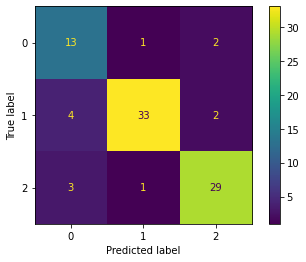

In [90]:
cm = confusion_matrix(y_test, y_pred)
cm
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.65      0.81      0.72        16
           2       0.94      0.85      0.89        39
           3       0.88      0.88      0.88        33

    accuracy                           0.85        88
   macro avg       0.82      0.85      0.83        88
weighted avg       0.87      0.85      0.86        88



# Implementation using SKLearn

In [115]:
import pandas as pd
import numpy as np

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2' -O "multiclass.csv"

--2024-03-14 06:39:16--  https://drive.google.com/uc?export=download&id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
Resolving drive.google.com... 142.250.187.206
Connecting to drive.google.com|142.250.187.206|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2&export=download [following]
--2024-03-14 06:39:16--  https://drive.usercontent.google.com/download?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2&export=download
Resolving drive.usercontent.google.com... 172.217.16.225
Connecting to drive.usercontent.google.com|172.217.16.225|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14578 (14K) [application/octet-stream]
Saving to: 'multiclass.csv'

multiclass.csv      100%[===================>]  14.24K  --.-KB/s    in 0s      

2024-03-14 06:39:17 (33.2 MB/s) - 'multiclass.csv' saved [14578/14578]



In [116]:
df = pd.read_csv("multiclass.csv")

In [117]:
X=df[['Region', 'Fresh',    'Milk', 'Grocery',  'Frozen',   'Detergents_Paper', 'Delicassen'    ]].copy()
y=df[['class']].copy()

In [118]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


In [119]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

y_sm.value_counts()

class
1        99
2        99
3        99
dtype: int64

In [120]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

In [121]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [126]:
knn = KNeighborsClassifier(n_neighbors=5,metric = "euclidean")

knn.fit(X_sm,y_sm)

KNeighborsClassifier(metric='euclidean')

In [127]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val_scaled)
print(classification_report(y_val,y_pred))


              precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.97      0.89      0.93        38
           3       0.94      0.94      0.94        31

    accuracy                           0.92        83
   macro avg       0.89      0.92      0.90        83
weighted avg       0.92      0.92      0.92        83



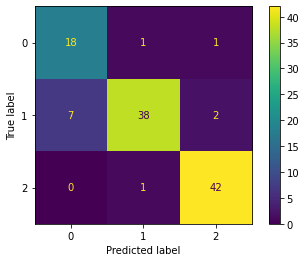

In [128]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

y_pred = knn.predict(X_test_scaled)
con_mat = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(con_mat).plot()

In [129]:
#Bias - Variance in KNN

In [130]:
acc = []
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_sm,y_sm)
    score = knn.score(X_val_scaled,y_val)
    acc.append(score)

In [131]:
acc[:5]

[0.891566265060241,
 0.8795180722891566,
 0.927710843373494,
 0.8674698795180723,
 0.9156626506024096]

Text(0, 0.5, 'Accuracy')

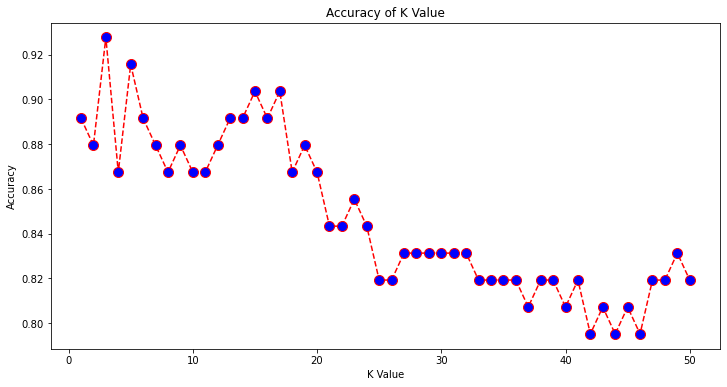

In [132]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [133]:
# find the best value for K

In [136]:
max(acc)

0.927710843373494

In [142]:
np.argmax(acc)+1 # gives max value of the item in the array

3

# KNN Imputer

In [143]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler


In [144]:
scaler = StandardScaler()
imputer = KNNImputer(n_neighbors=5)

pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation
])

In [145]:
df.isna().sum(axis=0)

X_transformed = pipeline.fit_transform(df)
X_transformed = pd.DataFrame(X_transformed,columns=df.columns)
X_transformed.isna().sum(axis=0)

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
class               0
dtype: int64